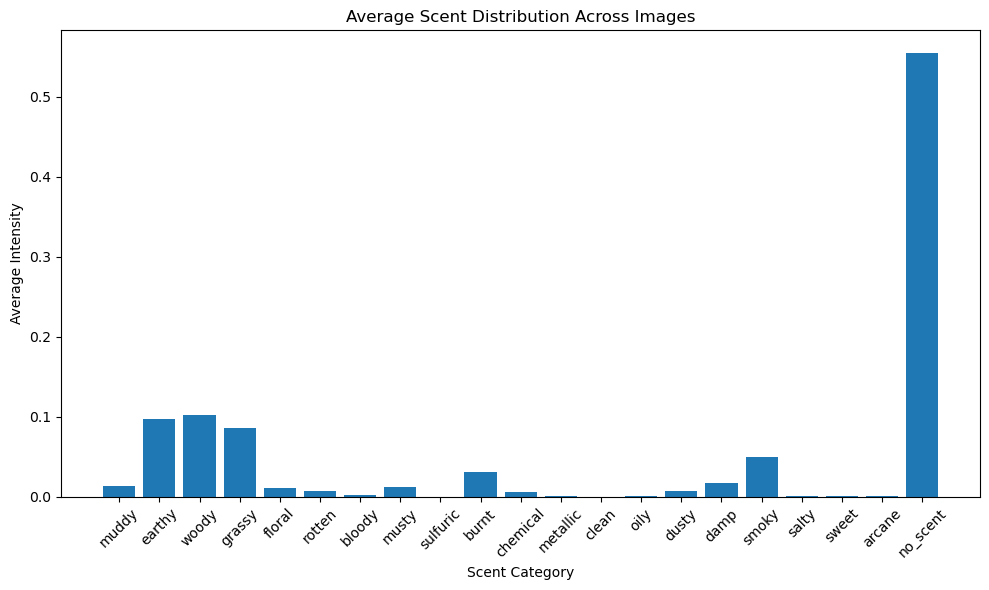

In [2]:
import json
import matplotlib.pyplot as plt

# Path to your JSON file
json_file = "scent_labels_with_captions1.json"

# Read the JSON file
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize sum for each scent category and a counter for processed images
scent_sums = {}
image_count = 0

# Iterate over each image result and sum up the intensities
for image, details in data.items():
    scent_distribution = details.get("scent_distribution", {})
    if scent_distribution:
        image_count += 1
        for label, value in scent_distribution.items():
            scent_sums[label] = scent_sums.get(label, 0) + value

# Compute the average distribution over all images
if image_count > 0:
    avg_distribution = {label: total / image_count for label, total in scent_sums.items()}
else:
    avg_distribution = {}

# Prepare data for plotting
labels = list(avg_distribution.keys())
values = [avg_distribution[label] for label in labels]

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel("Scent Category")
plt.ylabel("Average Intensity")
plt.title("Average Scent Distribution Across Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
